# Portfolio Optimisation

In [1]:
!pip install pandas_datareader==0.10.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install BVCscrap==0.2.1

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import scipy.optimize as sco
import random 
import BVCscrap  as bvc
import numpy as np
from scipy.stats import skew, kurtosis 
import seaborn as sns


In [4]:
bvc.notation() 

['Addoha',
 'AFMA',
 'Afric Indus',
 'Afriquia Gaz',
 'Agma',
 'Akdital',
 'Alliances',
 'Aluminium Maroc',
 'Aradei Capital',
 'ATLANTASANAD',
 'Attijariwafa',
 'Auto Hall',
 'Auto Nejma',
 'BALIMA',
 'BOA',
 'BCP',
 'BMCI',
 'Cartier Saada',
 'CDM',
 'CIH',
 'Ciments Maroc',
 'CMT',
 'Colorado',
 'COSUMAR',
 'CTM',
 'Dari Couspate',
 'Delta Holding',
 'Disty Technolog',
 'DISWAY',
 'Ennakl',
 'EQDOM',
 'FENIE BROSSETTE',
 'HPS',
 'IBMaroc',
 'Immr Invest',
 'INVOLYS',
 'Jet Contractors',
 'LABEL VIE',
 'LafargeHolcim',
 'Lesieur Cristal',
 'M2M Group',
 'Maghreb Oxygene',
 'Maghrebail',
 'Managem',
 'Maroc Leasing',
 'Maroc Telecom',
 'Microdata',
 'Mutandis',
 'Oulmes',
 'PROMOPHARM',
 'Rebab Company',
 'Res.Dar Saada',
 'Risma',
 'S2M',
 'Sanlam Maroc',
 'SALAFIN',
 'SMI',
 'Stokvis Nord Afr',
 'SNEP',
 'SODEP',
 'Sonasid',
 'SOTHEMA',
 'SRM',
 'Ste Boissons',
 'STROC Indus',
 'TAQA Morocco',
 'TGCC',
 'Timar',
 'Total Maroc',
 'Unimer',
 'Wafa Assur',
 'Zellidja',
 'MASI',
 'MSI20

In [5]:
tickers = ['Attijariwafa', 'BCP', 'BOA', 'Maroc Telecom', 'LafargeHolcim']
startDate = '2018-01-01'
endDate = '2023-04-11'

## Getting the data using BVCscrap

In the following part, we make the connection with the yahoo! finance API. This connection is made with the data.DataReader function of the pandas library. It takes four arguments: (a) a list with the names of the securities, (b) the starting date, (c) the ending date and (d) the name of the API (in this case 'yahoo'). For example, in the following cell you can see the historical values of the first security 'BP'. The result contains the values 'High', 'Low', 'Open', 'Close', 'Volume' and 'Adj Close'.

In [6]:
data0=bvc.loadata(tickers[0],start=startDate,end=endDate)
data1=bvc.loadata(tickers[1],start=startDate,end=endDate)
data2=bvc.loadata(tickers[2],start=startDate,end=endDate)
data3=bvc.loadata(tickers[3],start=startDate,end=endDate)
data4=bvc.loadata(tickers[4],start=startDate,end=endDate)

## Data Pre-processing

From all the security values we only need the data of the 'Open' column in order to use it for the empirical testing. Therefore, we firstly draw all the desired data from the Yahoo API and then we discard the unnecessary columns, as follows:

In [7]:
print(len(data0),'\n',len(data1),'\n',len(data2),'\n',len(data3),'\n',len(data4))

1249 
 1249 
 1249 
 1249 
 1246


In [8]:
def get_data(t,s,e):
    df=pd.DataFrame()
    for i in t:
        data=bvc.loadata(i,start=s,end=e)
        df[i]=data.loc[:]['Value'].values[:1245]
        df.index=data.loc[:]['Value'].index[:1245]
    return df

In [9]:
d=get_data(tickers,startDate,endDate)
d.index
d.index =  pd.to_datetime(d.index, format='%d/%m/%Y').date
d

,Attijariwafa,BCP,BOA,Maroc Telecom,LafargeHolcim
2018-04-09,492.00,292.00,229.5,148.55,NaN
2018-04-10,492.05,293.00,226.0,148.55,2015.0
2018-04-11,492.20,293.50,225.0,148.55,2000.0
2018-04-12,493.00,293.50,225.0,149.00,2005.0
2018-04-13,498.00,293.50,227.0,149.50,2000.0
...,...,...,...,...,...
2023-04-04,403.00,230.10,163.0,83.50,1386.0
2023-04-05,396.15,227.00,162.5,85.00,1400.0
2023-04-06,400.00,235.95,163.0,85.50,1390.0
2023-04-07,400.00,231.00,165.0,84.94,1390.0


## Security Values Visualisation

### Individual diagram for one security

Now, the dataframe stockValues contains the historical values of the securities. These values can be easily visualised with matplotlib library. The visualisation of security 'BP' is presented below:

In [10]:
#from pandas.plotting import register_matplotlib_converters
#egister_matplotlib_converters()
def plot_action(d,action):
    plt.figure(figsize=(16,9))
    plt.xlabel("Date", fontsize=16)
    plt.plot(d.index, d[action].values,label=action , color='red', lw=1)
    plt.title(f"Visualisation of {action} Values", fontsize=21)
    plt.xticks(fontsize=12, rotation=0)
    plt.legend()
    plt.show()

### Diagram for all securities

In [11]:
def plot_actions(actions):
    plt.figure(figsize=(16,9))
    plt.xlabel("Date", fontsize=16)
    for stock in actions:
        plt.plot(actions.index, actions[stock].values, label =stock, lw=1)
    plt.title("Visualisation of Stocks", fontsize=21)
    plt.xticks(fontsize=12, rotation=0)
    plt.legend()
    plt.show()

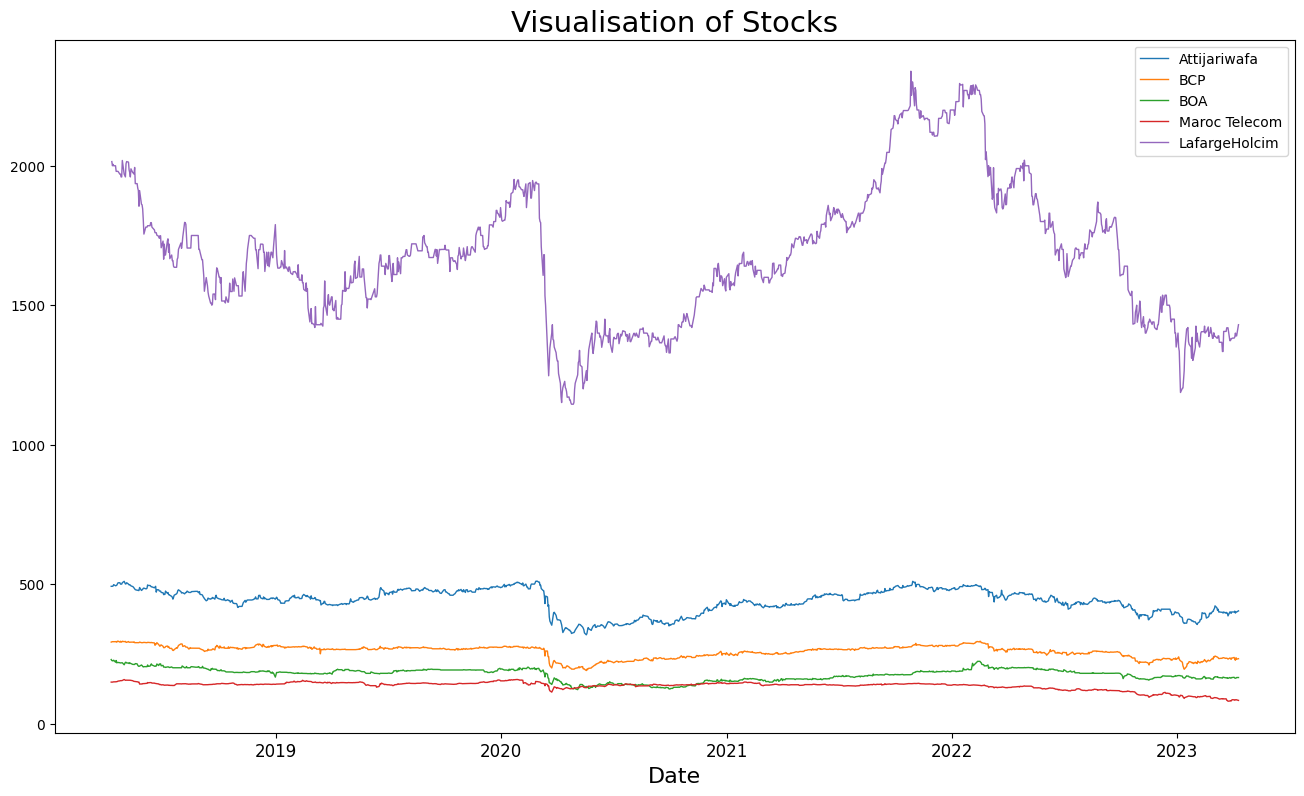

In [12]:
plot_actions(d)

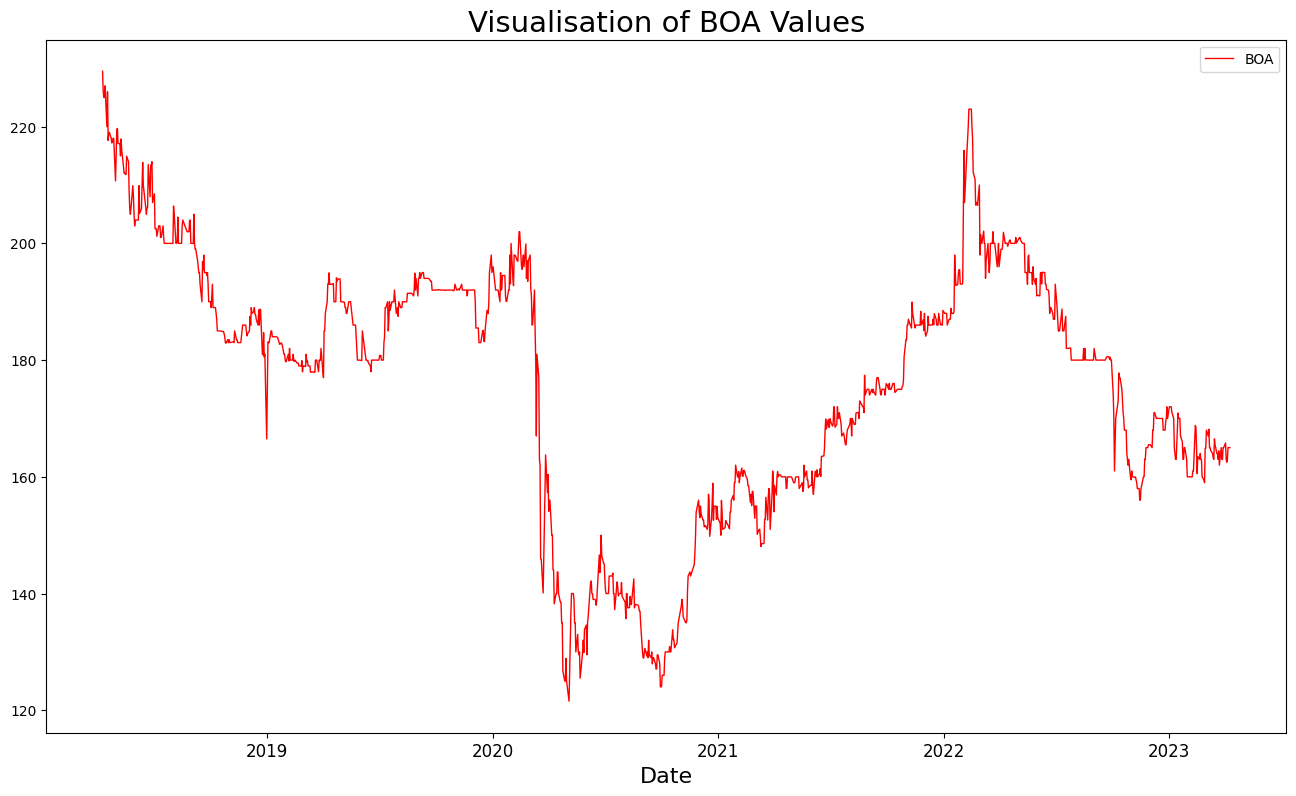

In [13]:
plot_action(d,'BOA')

### Security Returns

The following step is the calculation of the arithmetical return of the securities. This step is executed by converting the pandas dataframe to numpy array in order to make the calculations and then converting the returns list back to dataframe. Given the historical values the calculation of the arithmetical return is presented below:

In [26]:
# Define a function to calculate daily returns
def calculate_returns(df):
    return df.pct_change(1)

# Apply the function to your dataset
returns = calculate_returns(d)
returns = returns*100
# Print the first few rows of the returns data
print(returns.head())


            Attijariwafa       BCP       BOA  Maroc Telecom  LafargeHolcim
2018-04-09           NaN       NaN       NaN            NaN            NaN
2018-04-10      0.010163  0.342466 -1.525054       0.000000            NaN
2018-04-11      0.030485  0.170648 -0.442478       0.000000      -0.744417
2018-04-12      0.162536  0.000000  0.000000       0.302928       0.250000
2018-04-13      1.014199  0.000000  0.888889       0.335570      -0.249377


### Returns Visualisation

The visualisation of the return of each security is presented in the following figure:

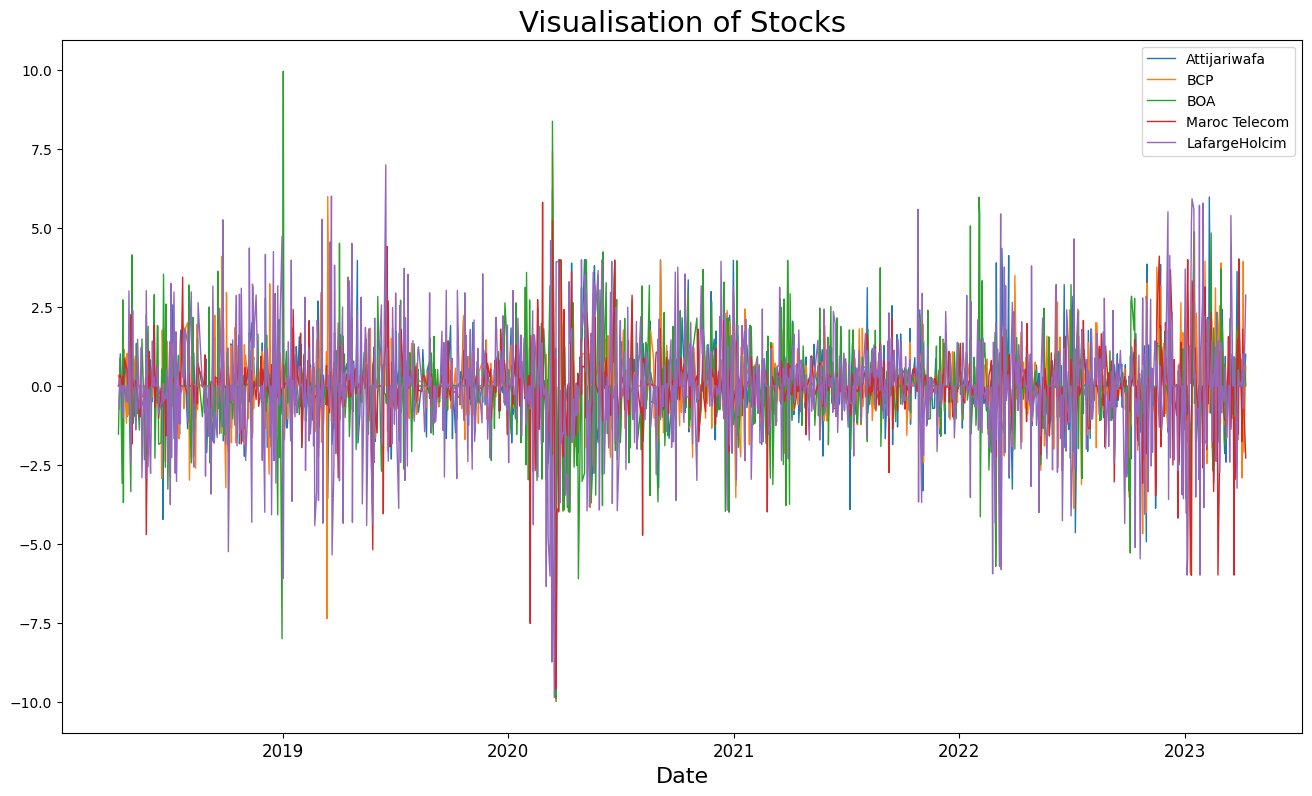

In [27]:
plot_actions(returns)

### Financial Statistics

In the next step, some fundamental statistical indices of the data are calculated. This proccess is made with the numpy library which supports a variety of statistical calculations, as shown in the following section:

In [82]:
# Calculate daily returns
returns = np.log(d / d.shift(1))*100
returns = np.clip(returns, a_min=0, a_max=None) # remplacer chaque valeur négative par une valeur très proche de zéro,
returns = returns.drop(d.index[0])# effacer les valeurs manquante de 1er ligne 
returns = returns.drop(d.index[1])# Meme chose
# Calculate mean, standard deviation, skewness, and kurtosis of daily returns for each stock
for stock in returns.columns:
    mean = np.mean(returns[stock])
    std = np.std(returns[stock])
    #skewness = skew(returns[stock])
    #kurtosis = kurtosis(returns[stock])
    print(f"{stock}: Mean={mean:.4f}, Std Dev={std:.4f}")

Attijariwafa: Mean=0.4120, Std Dev=0.7450
BCP: Mean=0.3800, Std Dev=0.7278
BOA: Mean=0.4166, Std Dev=0.9160
Maroc Telecom: Mean=0.2964, Std Dev=0.6229
LafargeHolcim: Mean=0.5786, Std Dev=1.0674


In [83]:
for i in  returns.columns:  
    MinReturn = np.min(returns, axis=0)
    MaxReturn = np.max(returns, axis=0)
    MeanReturn = np.mean(returns, axis=0)
    SD = np.std(returns, axis=0)
    VaR99 = np.percentile(returns, 1, axis=0)
    VaR97 = np.percentile(returns, 3, axis=0)
    VaR95 = np.percentile(returns, 5, axis=0)
    Skewness = skew(returns, axis=0, bias=False)
    Kurtosis = kurtosis(returns, axis=0, bias=False)
    AbsMinPerSD = np.abs(MinReturn) / SD

In [84]:
statistics = pd.DataFrame(
    {'MinReturn': MinReturn,
     'MaxReturn': MaxReturn,
     'Mean': MeanReturn,
     'SD': SD,
     'VaR99': VaR99,
     'VaR97': VaR97,
     'VaR95': VaR95,
     'Skewness': Skewness,
     'Kurtosis': Kurtosis,
     'AbsMinPerSD': AbsMinPerSD,     
    }, index=returns.columns)    
    
    
display(statistics)

,MinReturn,MaxReturn,Mean,SD,VaR99,VaR97,VaR95,Skewness,Kurtosis,AbsMinPerSD
Attijariwafa,0.0,6.043317,0.412019,0.744990,0.0,0.0,0.0,2.850565,10.662278,0.0
BCP,0.0,7.174390,0.379976,0.727810,0.0,0.0,0.0,3.182313,14.605236,0.0
BOA,0.0,9.503714,0.416591,0.915974,0.0,0.0,0.0,3.386224,16.728492,0.0
Maroc Telecom,0.0,5.653531,0.296444,0.622862,0.0,0.0,0.0,3.777096,18.461731,0.0
LafargeHolcim,0.0,6.769501,0.578593,1.067435,0.0,0.0,0.0,2.339269,5.754886,0.0


### Covariance - Correlation

Now, given the arithmetical returns of the securities, we can compute the variance=covariance matrix among all securities. The computation can be achieved with the pandas function cov() which calculates the covariance matrix of a dataframe.

In [85]:
#returns = returns.drop('LafargeHolcim', axis=1)
cov = returns.cov()
covarianceMatrix = np.array(cov)
print("============  Covariance Matrix  ============")
display(cov)

============  Covariance Matrix  ============


,Attijariwafa,BCP,BOA,Maroc Telecom,LafargeHolcim
Attijariwafa,0.555458,0.238696,0.160828,0.172641,0.037771
BCP,0.238696,0.530134,0.184599,0.161388,0.034669
BOA,0.160828,0.184599,0.839684,0.161446,0.004346
Maroc Telecom,0.172641,0.161388,0.161446,0.388269,-0.000784
LafargeHolcim,0.037771,0.034669,0.004346,-0.000784,1.140334


In [86]:
corr = returns.corr()
correlationMatrix = np.array(corr)
print("============  Correlation Matrix  ============")
display(corr)


============  Correlation Matrix  ============


,Attijariwafa,BCP,BOA,Maroc Telecom,LafargeHolcim
Attijariwafa,1.000000,0.439873,0.235494,0.371751,0.047459
BCP,0.439873,1.000000,0.276681,0.355723,0.044590
BOA,0.235494,0.276681,1.000000,0.282751,0.004441
Maroc Telecom,0.371751,0.355723,0.282751,1.000000,-0.001178
LafargeHolcim,0.047459,0.044590,0.004441,-0.001178,1.000000


<AxesSubplot:>

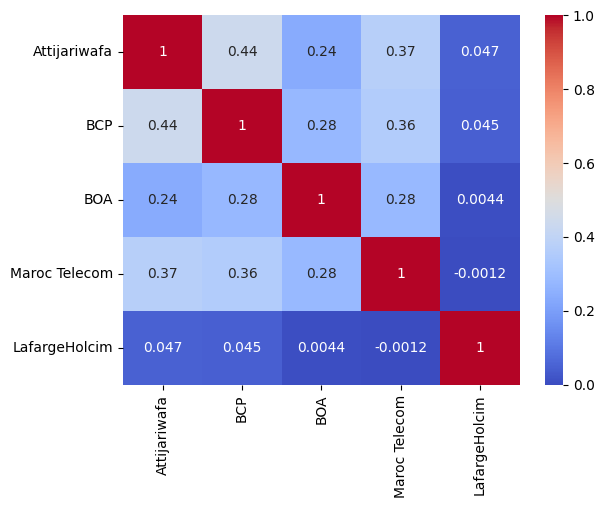

In [87]:
# calculate the correlation matrix
corr_matrix = returns.corr()
# plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)


### Portfolio Optimisation

In this section, we attempt to optimize the portfolio of securities, using the mean - variance method. The  optimization problem is a quadratic bi-objective problem, which will be solved parametrically, setting the expected return as a parameter. We use the SciPy optimizer library in order to solve the problem:

### Global Minimum Variance Portfolio

Initially, we compute the global minimum variance portfolio (GMVP) using the SciPy minimize function. The minimize function takes as an argument the mean return column-vector and the covariance 2D matrix and computes the proportions of the GMVP minimizing the quantity defined in the function named 'Portfolio Volatility' which is the standard deviation of the portfolio. Additionally, we set the constraint that the weights sum to 1 and that the bounds of the proportions are (0,1), imposing the short sales restriction.

Risk of minimum volatility portfolio: 0.4667660010942142
Return of minimum volatility portfolio: 0.39425392489177224
Sharpe Ratio of minimum volatility portfolio: 0.8446500472775313
[0.15494771 0.1749185  0.11945329 0.37014244 0.18053806]


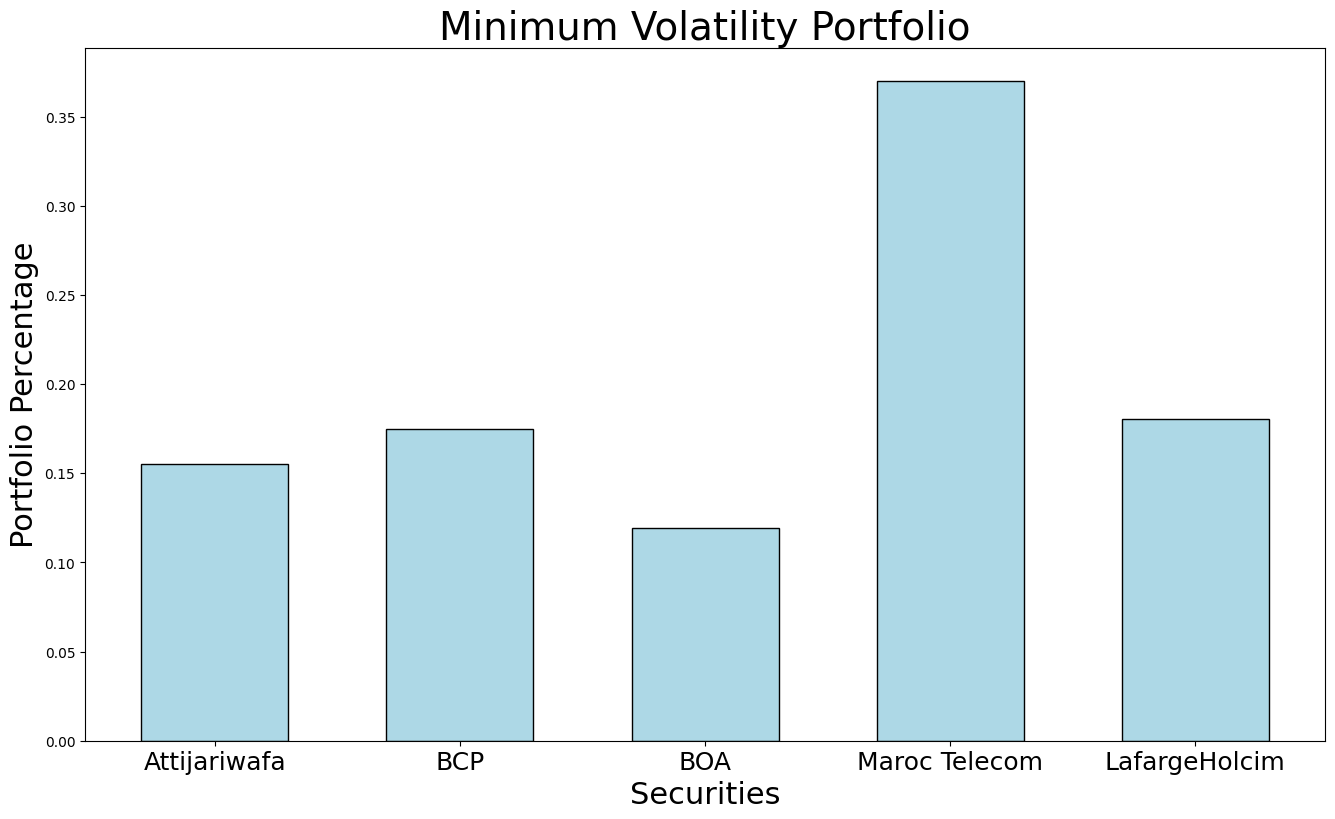

In [88]:
numOfSecurities = returns.shape[1]
#Objective Function
def portfolioVolatility(weights, MeanReturn, covarianceMatrix):
    std = np.sqrt(np.dot(weights.T, np.dot(covarianceMatrix, weights))) 
    return std

#Constraints
args = (MeanReturn, covarianceMatrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0,1)
bounds = tuple(bound for asset in range(numOfSecurities))

#Optimisation Function
minVolatilityPortfolio = sco.minimize(portfolioVolatility, [1./1000,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

sdPort1 = np.sqrt(np.dot(minVolatilityPortfolio['x'].T, np.dot(covarianceMatrix, minVolatilityPortfolio['x']))) 
retPort1 = np.sum(MeanReturn*minVolatilityPortfolio['x'] ) 


print("Risk of minimum volatility portfolio:", sdPort1)
print("Return of minimum volatility portfolio:", retPort1)
print("Sharpe Ratio of minimum volatility portfolio:", retPort1/sdPort1)
print(minVolatilityPortfolio['x'])

plt.figure(figsize=(16,9))
plt.bar(tickers, minVolatilityPortfolio['x'], color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r"Securities", fontsize=22)
plt.ylabel(r"Portfolio Percentage", fontsize=22)
plt.title(r"Minimum Volatility Portfolio", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
plt.savefig("barplot8.png", dpi=300)

### Efficient Frontier

In this step, we parametrically solve the same problem in order to gradually find the efficient frontier. Therefore, we compute a number of efficient portfolios between the GMVP and the maximum return portfolio.

In [89]:
numOfPortfolios = 30
maxReturn = max(MeanReturn)
returnRange = np.linspace(retPort1, maxReturn, numOfPortfolios)
efficientFrontier = []
AllReturns = []
AllSDs = []
for target in returnRange:
    args = (MeanReturn, covarianceMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(MeanReturn*x) - target},
	                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(numOfSecurities))
    result = sco.minimize(portfolioVolatility, numOfSecurities*[1./numOfSecurities,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    efficientFrontier.append(result)
    AllSDs.append(np.sqrt(np.dot(result['x'].T, np.dot(covarianceMatrix, result['x']))))
    AllReturns.append(np.sum(MeanReturn*result['x'])) 

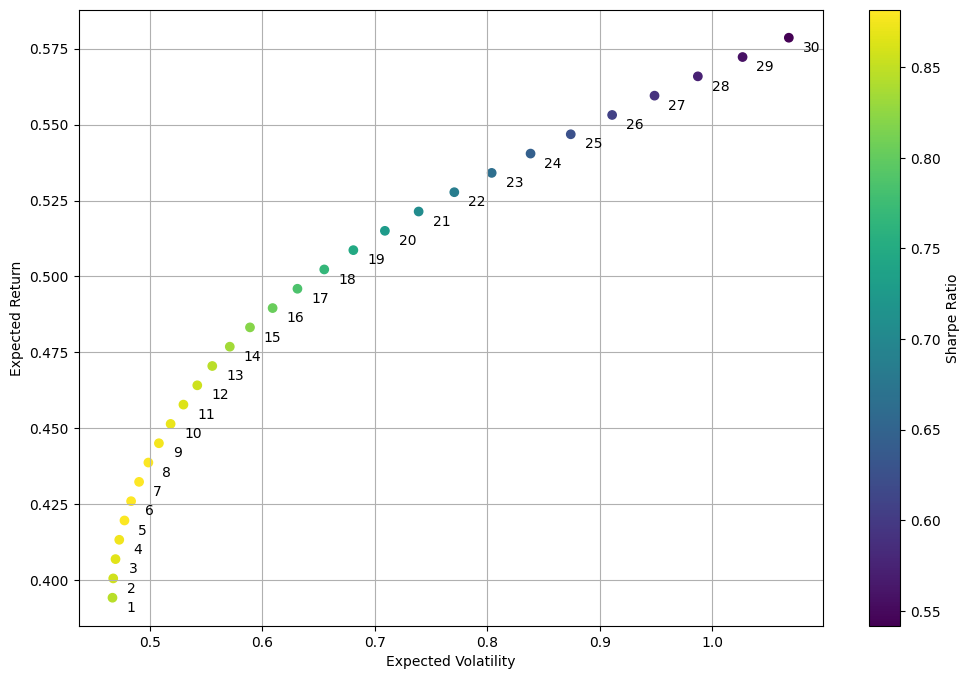

In [90]:
# convert lists to NumPy arrays
AllReturns = np.array(AllReturns)
AllSDs = np.array(AllSDs)

# plot efficient frontier
plt.figure(figsize=(12,8))
plt.scatter(AllSDs, AllReturns, c=AllReturns/AllSDs, marker='o')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

# add labels for efficient portfolios
for i in range(numOfPortfolios):
    plt.annotate(str(i+1), xy=(AllSDs[i], AllReturns[i]), xytext=(10,-10), textcoords='offset points')
    
plt.show()



,Attijariwafa,BCP,BOA,Maroc Telecom,LafargeHolcim
1,0.16,0.18,0.12,0.37,0.18
2,0.17,0.17,0.13,0.34,0.20
3,0.18,0.17,0.13,0.31,0.21
4,0.19,0.17,0.14,0.27,0.23
5,0.20,0.17,0.15,0.24,0.24
6,0.21,0.17,0.15,0.21,0.26
7,0.22,0.17,0.16,0.18,0.27
8,0.23,0.17,0.17,0.15,0.29
9,0.24,0.17,0.17,0.11,0.31
10,0.25,0.17,0.18,0.08,0.32


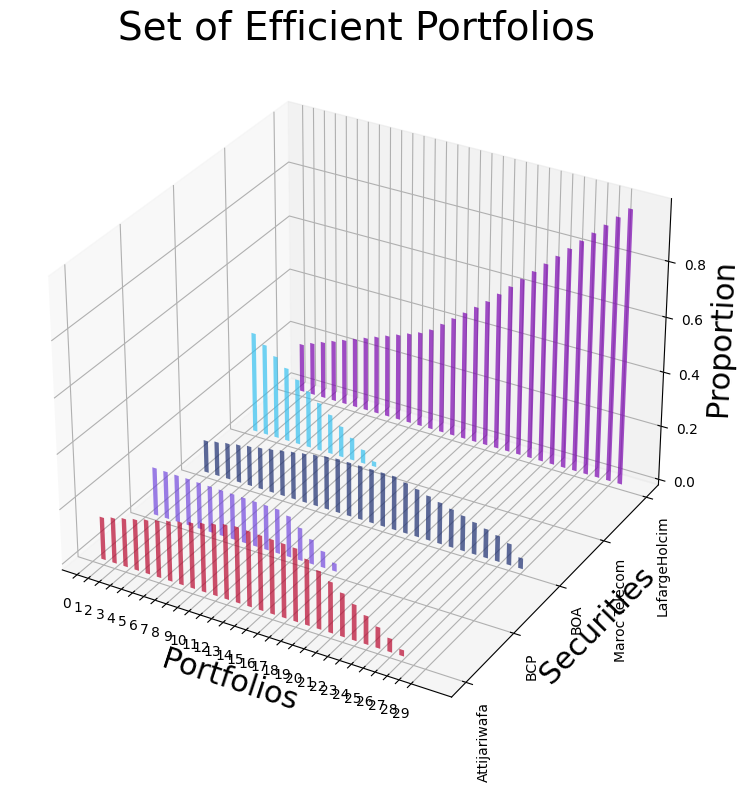

In [91]:
efficientPortfolios = [0 for i in range(numOfPortfolios)]
for i in range(numOfPortfolios):
    efficientPortfolios[i] = np.round(efficientFrontier[i].x,2)

df = pd.DataFrame(efficientPortfolios, columns=tickers)
df.index = df.index + 1
display(df)

weightingFactor = [[0 for i in range(numOfPortfolios)] for j in range(numOfSecurities)]
for i in range(numOfSecurities):
    for j in range(numOfPortfolios):
        weightingFactor[i][j] = efficientFrontier[j].x[i]
        
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
for z in range(numOfSecurities):
    xs = np.arange(1, numOfPortfolios+1)
    ys = weightingFactor[z]
    cs =(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    ax.bar(xs, ys, z, zdir='y', color=cs, alpha=0.7, width=0.4)
plt.yticks(np.arange(numOfSecurities), tickers, rotation='vertical')
plt.xticks(np.arange(numOfPortfolios))
ax.set_xlabel(r'Portfolios', fontsize=22)
ax.set_ylabel(r'Securities', fontsize=22)
ax.set_zlabel(r'Proportion', fontsize=22)
plt.title(r"Set of Efficient Portfolios", fontsize=28)
plt.savefig("barplot11.png", dpi=150)

,Attijariwafa,BCP,BOA,Maroc Telecom,LafargeHolcim
1,0.16,0.18,0.12,0.37,0.18
2,0.17,0.17,0.13,0.34,0.20
3,0.18,0.17,0.13,0.31,0.21
4,0.19,0.17,0.14,0.27,0.23
5,0.20,0.17,0.15,0.24,0.24
6,0.21,0.17,0.15,0.21,0.26
7,0.22,0.17,0.16,0.18,0.27
8,0.23,0.17,0.17,0.15,0.29
9,0.24,0.17,0.17,0.11,0.31
10,0.25,0.17,0.18,0.08,0.32


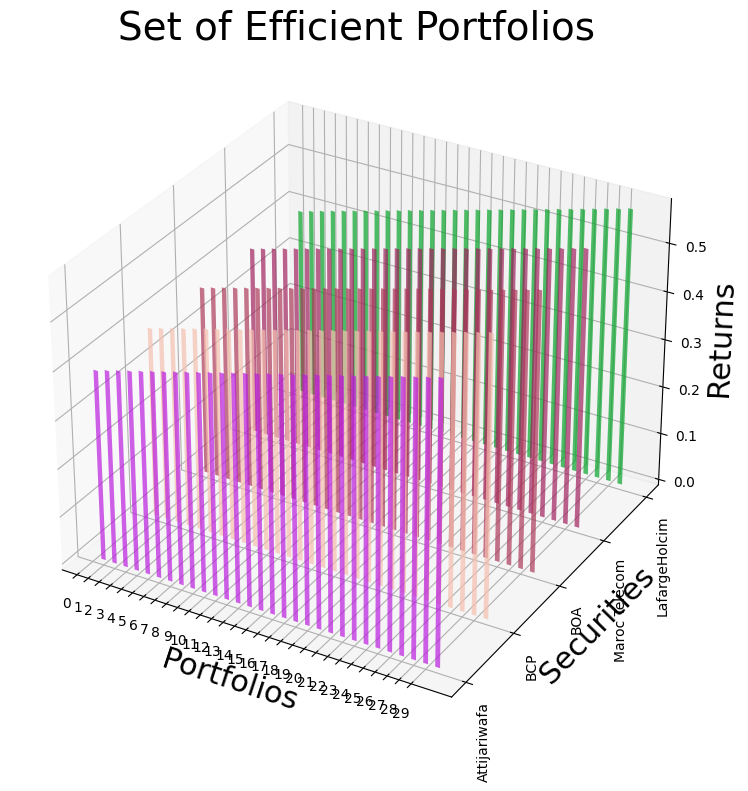

In [92]:
efficientPortfolios = [0 for i in range(numOfPortfolios)]
for i in range(numOfPortfolios):
    efficientPortfolios[i] = np.round(efficientFrontier[i].x, 2)

df = pd.DataFrame(efficientPortfolios, columns=tickers)
df.index = df.index + 1
display(df)

returnsMatrix = np.array(returns)
returnsPortfolios = [0 for i in range(numOfPortfolios)]
weightingFactor = np.array(weightingFactor)
#for i in range(numOfPortfolios):
 #   returnsPortfolios[i] = np.dot(weightingFactor[:, i], returnsMatrix)

returnsPortfolios = np.dot(weightingFactor.T, MeanReturn)

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

for z in range(numOfSecurities):
    xs = np.arange(1, numOfPortfolios+1)
    ys = [returnsPortfolios[i] for i in range(numOfPortfolios)]
    cs = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    ax.bar(xs, ys, z, zdir='y', color=cs, alpha=0.7, width=0.4)
plt.yticks(np.arange(numOfSecurities), tickers, rotation='vertical')
plt.xticks(np.arange(numOfPortfolios))
ax.set_xlabel(r'Portfolios', fontsize=22)
ax.set_ylabel(r'Securities', fontsize=22)
ax.set_zlabel(r'Returns', fontsize=22)
plt.title(r"Set of Efficient Portfolios", fontsize=28)
plt.savefig("barplot11.png", dpi=150)


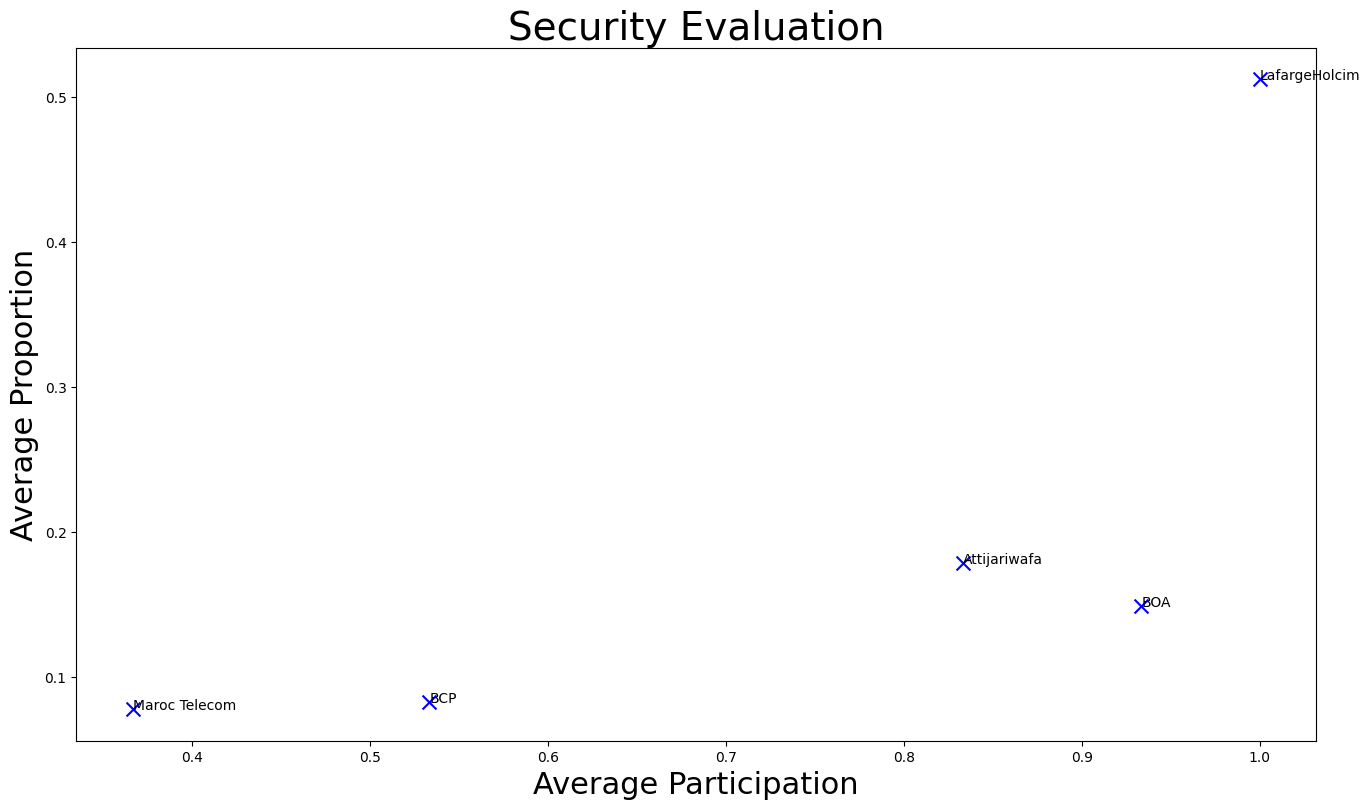

In [93]:
securityParticipation = [0 for i in range(numOfSecurities)]
for i in range(numOfSecurities):
    for j in range(numOfPortfolios):
        if weightingFactor[i][j] >= 0.05:
            securityParticipation[i] = securityParticipation[i] + 1
    securityParticipation[i] = securityParticipation[i] / numOfPortfolios
            
securityAvgProportion = [0 for i in range(numOfSecurities)]
for i in range(numOfSecurities):
    securityAvgProportion[i] = np.mean(weightingFactor[i])

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0, 1, numOfSecurities))
for i,c in zip(range(numOfSecurities),colors):
    if(securityParticipation[i] != 0):
        plt.scatter(securityParticipation[i], securityAvgProportion[i], c='b', marker='x' ,label=tickers[i], s=100)

for i, txt in enumerate(tickers):
    if(securityParticipation[i] != 0):
        ax.annotate(txt, (securityParticipation[i], securityAvgProportion[i]))
plt.xlabel(r"Average Participation", fontsize=22)
plt.ylabel(r"Average Proportion", fontsize=22)
plt.title(r"Security Evaluation", fontsize=28)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True, shadow=True)
plt.savefig("barplot10.png", dpi=300)

### Finding the Global Minimum Variance Portfolio using QR Decomposition

In [94]:
# augment the matrix and vector
top_mat = np.concatenate([2 * covarianceMatrix, np.ones((numOfSecurities, 1))], axis=1)
bot_vec = np.concatenate([np.ones(numOfSecurities), [0]])
Am_mat = np.vstack([top_mat, bot_vec])
b_vec = np.concatenate([np.zeros(numOfSecurities), [1]])

# perform QR decomposition and solve
q_mat, r_mat = np.linalg.qr(Am_mat)
z_m_vec = np.linalg.solve(r_mat, np.dot(q_mat.T, b_vec))
m_vec = z_m_vec[:numOfSecurities]

print(m_vec)

[0.15515967 0.17513747 0.1191398  0.37016839 0.18039466]


In the context of portfolio optimization, the main objective is to find the optimal weights of a portfolio that maximize the expected return and minimize the risk. One common approach to solve this problem is through quadratic programming, which can be implemented using the scipy.optimize.minimize function. However, the QR decomposition method can also be used to solve this problem. The QR decomposition method decomposes a matrix into an orthogonal matrix and a triangular matrix. This decomposition can be used to solve the system of linear equations that arise in the portfolio optimization problem.

In this case, the portfolio optimization problem was solved using both the QR decomposition method and the scipy.optimize.minimize function. The results obtained using the QR decomposition method were found to be identical to those obtained using the scipy.optimize.minimize function. This confirms that both methods are mathematically equivalent and can be used interchangeably to solve the portfolio optimization problem. Furthermore, the QR decomposition method has the advantage of being computationally efficient and numerically stable, which makes it an attractive alternative to the scipy.optimize.minimize function for solving the portfolio optimization problem.

### Finding the Global Minimum Variance Portfolio using SVD Decomposition

In [95]:
# augment the matrix and vector
top_mat = np.concatenate([2 * covarianceMatrix, np.ones((numOfSecurities, 1))], axis=1)
bot_vec = np.concatenate([np.ones(numOfSecurities), [0]])
Am_mat = np.vstack([top_mat, bot_vec])
b_vec = np.concatenate([np.zeros(numOfSecurities), [1]])

# perform SVD decomposition and solve
u_mat, s_vec, vh_mat = np.linalg.svd(Am_mat)
z_m_vec = np.dot(vh_mat.T, np.dot(np.diag(1/s_vec), np.dot(u_mat.T, b_vec)))
m_vec = z_m_vec[:numOfSecurities]

print(m_vec)


[0.15515967 0.17513747 0.1191398  0.37016839 0.18039466]


### Efficient Frontier using 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=65af1ba5-b07e-4d48-ae2e-674f39860e68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>